# Test for Calculating Room Acoustic Parameter
- using module 'pyRoomAcoustic'


In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time

# Import Audio
import wave
import pyaudio
#import librosa

import numpy as np
from scipy.io import wavfile
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg



In [2]:
# Path of audiofiles folder
audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# Define wave file name text to open
# Path + wave file name

#audio_fname = "TyndallBruceMonument.wav"
#audio_fname = "ElvedenHallMarbleHall.wav'"
#audio_fname = "EmptyApartmentBedroom.wav"
#audio_fname = "FalklandPalaceRoyalTennisCourt.wav"
#audio_fname = "InsidePiano.wav"
audio_fname = "MaesHowe.wav"
#audio_fname = "SportsCentreUniversityOfYork.wav"
#audio_fname = "StairwayUniversityOfYork.wav"
#audio_fname = "StAndrewsChurch.wav"

wav_fname = os.path.join(audio_dir, audio_fname)


ossWav_fmt_chunk=  (18, 3, 2, 44100, 352800, 8, 32) , ossWav_length=  352800
Audio Format = 3
Number of Channel = 2
Sampling Frequency = 44100
Byte Rate = 352800
Block Align = 8
Bits per Sample = 32
Time = 1.0 sec
Length =  44100


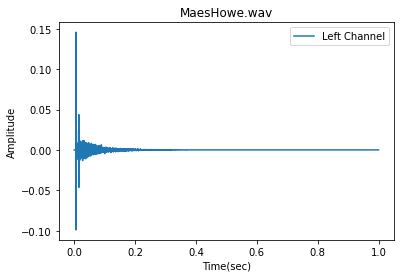

In [3]:
# Read .wav file using pyOssWavfile.read() & Extract .wav file header information

ossWav_fmt_chunk, ossWav_data, ossWav_length = pyOssWavfile.read(wav_fname)
ossWav_format, ossWav_numch, ossWav_fs, ossWav_byterate, ossWav_blockalign, ossWav_bitdepth = pyOssWavfile.extractWavFmtChunk(ossWav_fmt_chunk)
ossWav_time = ossWav_data.shape[0] / ossWav_fs

print("ossWav_fmt_chunk= ", ossWav_fmt_chunk, ", ossWav_length= ", ossWav_length)
print("Audio Format =", ossWav_format)
print("Number of Channel =", ossWav_numch)
print("Sampling Frequency =", ossWav_fs)
print("Byte Rate =", ossWav_byterate)       # 일종의 Checksum 
print("Block Align =", ossWav_blockalign)
print("Bits per Sample =", ossWav_bitdepth)
print("Time =", ossWav_time, "sec")
print("Length = ", ossWav_data.shape[0])

# Plot loaded wave file
dbg.dPlotAudio(ossWav_fs, ossWav_data[:,0], audio_fname, "Left Channel", "Time(sec)", "Amplitude")



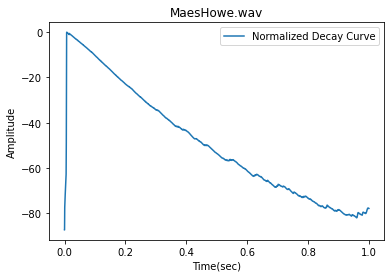

ossWav_T60= [[0.595]] ossWav_T60 nonLin= [[8.3]]
ossWav_EDT= [[0.546]] ossWav_EDT nonLin= [[1.9]]
ossWav_T10= [[0.091]] ossWav_T10 nonLin=EDT= [[1.9]]
ossWav_T20= [[0.483]] , ossWav_T20 nonLin= [[0.4]]
ossWav_T30= [[0.496]] , ossWav_T30 nonLin= [[0.8]]


In [6]:
# Calculate T60
import pyRoomAcoustic as room

ossWav_decaycurve = room.decayCurve(ossWav_data[:,0], ossWav_time, ossWav_fs)

# Plot Normalized Decay Curve
dbg.dPlotAudio(ossWav_fs, ossWav_decaycurve, audio_fname, "Normalized Decay Curve", "Time(sec)", "Amplitude")

# Calculate T60
ossWav_t60, ossWav_t60nonLin = room.T60(ossWav_decaycurve, ossWav_fs) 
print("ossWav_T60=", ossWav_t60, "ossWav_T60 nonLin=", ossWav_t60nonLin)            # for Debug

# Calculate EDT
ossWav_EDT, ossWav_EDTnonLin = room.EDT(ossWav_decaycurve, ossWav_fs)
print("ossWav_EDT=", ossWav_EDT, "ossWav_EDT nonLin=", ossWav_EDTnonLin)            # for Debug
print("ossWav_T10=", ossWav_EDT/6, "ossWav_T10 nonLin=EDT=", ossWav_EDTnonLin)      # for Debug

# Calculate T20
ossWav_t20, ossWav_t20nonLin = room.T20(ossWav_decaycurve, ossWav_fs)
print("ossWav_T20=", ossWav_t20, ", ossWav_T20 nonLin=", ossWav_t20nonLin)          # for Debug

# Calculate T30
ossWav_t30, ossWav_t30nonLin = room.T30(ossWav_decaycurve, ossWav_fs)
print("ossWav_T30=", ossWav_t30, ", ossWav_T30 nonLin=", ossWav_t30nonLin)          # for Debug



In [7]:
# Calculate C50, C80, D80

print("ossWav_data.dtype =",ossWav_data.dtype)

# C50
#ossWav_C50, ossWav_C50nonLin = room.C50(ossWav_data[:,0], ossWav_fs)
#print("ossWav_C50=", ossWav_C50, "ossWav_C50 nonLin=", ossWav_C50nonLin)         # for Debug

# C80
#ossWav_C80, ossWav_C80nonLin = room.C80(ossWav_data[:,0], ossWav_fs)
#print("ossWav_C80=", ossWav_C80, "ossWav_C50 nonLin=", ossWav_C80nonLin)         # for Debug

# D50  
#ossWav_D50, ossWav_D50nonLin = room.D50(ossWav_data[:,0], ossWav_fs)
#print("ossWav_D50=", ossWav_D50, "ossWav_D50 nonLin=", ossWav_D50nonLin)         # for Debug



ossWav_data.dtype = float32


TypeError: cannot unpack non-iterable numpy.float64 object